Dataset: https://www.kaggle.com/datasets/stacknishant/nse-stock-historical-price-data?resource=download

**1. Data Preprocessing and Exploratory Data Analysis**
* Clean the dataset, handling any missing values or outliers
* Perform basic statistical analysis on the stock prices and volumes
* Visualize the price trends of the first 10 stocks.

**2. Correlation Analysis**
* Create a correlation matrix of stock returns
* Identify the most correlated pairs of stocks
* Visualize the correlations using a heatmap

**3. Time Series Decomposition**
* Choose one stock and perform time series decomposition
* Identify trend, seasonality, and residual components
* Interpret the results and their implications for trading

**4. Anomaly Detection**
* Develop a method to detect anomalous price movements
* Identify and list the top 5 most significant anomalies in the dataset
* Investigate and explain possible reasons for these anomalies

## Import Libraries & Data

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

In [116]:
df = pd.read_csv('nse_all_stock_data.csv')
df

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,...,COOLCAPS,ALLETEC,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
0,1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,2024-07-01,3120.300049,3978.199951,1705.199951,1211.849976,1454.000000,841.950012,1590.800049,996.349976,429.049988,...,NaN,NaN,220.410004,3.90,402.799988,134.960007,384.850006,82.779999,211.089996,27.440001
8466,2024-07-02,3130.350098,4017.399902,1730.599976,1190.599976,1418.949951,826.150024,1621.050049,985.450012,425.500000,...,NaN,NaN,216.110001,3.87,409.799988,130.729996,396.700012,83.349998,211.740005,27.770000
8467,2024-07-03,3104.850098,3965.250000,1768.650024,1201.599976,1419.849976,839.950012,1627.400024,988.200012,428.299988,...,NaN,NaN,227.800003,3.87,429.350006,132.220001,394.200012,83.269997,225.880005,27.700001
8468,2024-07-04,3108.050049,4020.949951,1727.150024,1233.000000,1423.050049,839.299988,1650.650024,1010.200012,429.049988,...,NaN,NaN,227.429993,4.04,428.750000,131.360001,388.250000,82.980003,223.800003,27.580000


# Data Analysis & Preprocessing

In [117]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      1991-01-02
1      1991-01-03
2      1991-01-04
3      1991-01-07
4      1991-01-08
          ...    
8465   2024-07-01
8466   2024-07-02
8467   2024-07-03
8468   2024-07-04
8469   2024-07-05
Name: Date, Length: 8470, dtype: datetime64[ns]

### Handeling Null/NaN Values

In [118]:
df.isna().sum()[df.isna().sum() > 0]

RELIANCE      1310
TCS           3034
HDFCBANK      1307
ICICIBANK     3005
BHARTIARTL    3005
              ... 
DONEAR        4147
CAREERP       5081
INTLCONV      7778
SHREEPUSHK    6297
PRITIKAUTO    7753
Length: 1417, dtype: int64

In [119]:
df.bfill(inplace=True)
df

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,...,COOLCAPS,ALLETEC,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
0,1991-01-02,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,...,NaN,NaN,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
1,1991-01-03,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,...,NaN,NaN,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
2,1991-01-04,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,...,NaN,NaN,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
3,1991-01-07,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,...,NaN,NaN,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
4,1991-01-08,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,...,NaN,NaN,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,2024-07-01,3120.300049,3978.199951,1705.199951,1211.849976,1454.000000,841.950012,1590.800049,996.349976,429.049988,...,NaN,NaN,220.410004,3.900000,402.799988,134.960007,384.850006,82.779999,211.089996,27.440001
8466,2024-07-02,3130.350098,4017.399902,1730.599976,1190.599976,1418.949951,826.150024,1621.050049,985.450012,425.500000,...,NaN,NaN,216.110001,3.870000,409.799988,130.729996,396.700012,83.349998,211.740005,27.770000
8467,2024-07-03,3104.850098,3965.250000,1768.650024,1201.599976,1419.849976,839.950012,1627.400024,988.200012,428.299988,...,NaN,NaN,227.800003,3.870000,429.350006,132.220001,394.200012,83.269997,225.880005,27.700001
8468,2024-07-04,3108.050049,4020.949951,1727.150024,1233.000000,1423.050049,839.299988,1650.650024,1010.200012,429.049988,...,NaN,NaN,227.429993,4.040000,428.750000,131.360001,388.250000,82.980003,223.800003,27.580000


In [120]:
df.isna().sum()[df.isna().sum() > 0]

L&TFH         8470
UJJIVAN       8470
SPECTRUM      8470
NPST          8470
JSLL          8470
ORIANA        8470
GIRIRAJ       8470
BETA          8470
SICALLOG         5
INNOVANA      8470
KOTYARK       8470
REMUS         8470
OWAIS         8470
BASILIC       8470
ALPEXSOLAR    8470
DENTALKART    8470
VINYAS        8470
EMKAYTOOLS    8470
SAHANA        8470
ANNAPURNA     8470
SOLEX         8470
PHANTOMFX     8470
KODYTECH      8470
KRISHIVAL     8470
VISHNUINFR    8470
ACCENTMIC     8470
COOLCAPS      8470
ALLETEC       8470
dtype: int64

In [121]:
df = df.dropna(axis=1, thresh=int(0.5 * len(df)))
df

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,...,MAZDA,MINDTECK,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
0,1991-01-02,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,...,359.149994,94.650002,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
1,1991-01-03,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,...,359.149994,94.650002,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
2,1991-01-04,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,...,359.149994,94.650002,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
3,1991-01-07,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,...,359.149994,94.650002,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
4,1991-01-08,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,...,359.149994,94.650002,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,2024-07-01,3120.300049,3978.199951,1705.199951,1211.849976,1454.000000,841.950012,1590.800049,996.349976,429.049988,...,1434.300049,313.850006,220.410004,3.900000,402.799988,134.960007,384.850006,82.779999,211.089996,27.440001
8466,2024-07-02,3130.350098,4017.399902,1730.599976,1190.599976,1418.949951,826.150024,1621.050049,985.450012,425.500000,...,1449.849976,305.649994,216.110001,3.870000,409.799988,130.729996,396.700012,83.349998,211.740005,27.770000
8467,2024-07-03,3104.850098,3965.250000,1768.650024,1201.599976,1419.849976,839.950012,1627.400024,988.200012,428.299988,...,1432.449951,325.399994,227.800003,3.870000,429.350006,132.220001,394.200012,83.269997,225.880005,27.700001
8468,2024-07-04,3108.050049,4020.949951,1727.150024,1233.000000,1423.050049,839.299988,1650.650024,1010.200012,429.049988,...,1422.050049,338.950012,227.429993,4.040000,428.750000,131.360001,388.250000,82.980003,223.800003,27.580000


A column must have at least 50% non-NaN values (or fewer than 50% NaN values) to be retained.

In [122]:
df.isna().sum()[df.isna().sum() > 0]

SICALLOG    5
dtype: int64

In [123]:
df = df.fillna(df.mean())

df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

In [124]:
df.describe()

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,...,MAZDA,MINDTECK,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
count,8470,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,...,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000
mean,2007-07-11 12:40:37.969303296,514.448543,798.467475,370.661868,200.478550,237.963422,162.517726,363.667733,865.947403,114.127340,...,404.852374,94.208986,30.543493,3.187880,122.100184,130.458937,457.892586,73.098919,90.864825,18.353577
min,1991-01-02 00:00:00,10.975116,35.474998,2.435000,20.100000,9.350544,13.346102,0.763183,531.849976,4.182222,...,233.699997,12.750000,7.100000,0.624703,14.000000,8.900000,51.150002,47.750000,59.349998,12.700000
25%,1999-02-12 18:00:00,25.584803,39.700001,7.496250,25.127272,15.681876,21.329467,19.350976,875.250000,14.392500,...,359.149994,94.650002,16.775000,2.502025,69.550003,31.350000,149.887505,73.250000,63.049999,18.150000
50%,2007-05-09 12:00:00,298.363907,216.287498,99.955002,113.527271,251.631027,110.849632,197.207817,875.250000,58.183334,...,359.149994,94.650002,16.775000,2.502025,69.550003,205.699997,660.000000,73.250000,63.049999,18.150000
75%,2015-12-06 06:00:00,497.448433,1236.475037,535.462479,256.681824,346.223610,253.587505,496.924988,875.250000,216.283337,...,359.149994,94.650002,33.650002,2.609474,117.000000,214.649994,660.000000,73.250000,77.700003,18.150000
max,2024-07-05 00:00:00,3177.250000,4219.250000,1768.650024,1233.400024,1475.800049,905.650024,1939.500000,1105.250000,492.149994,...,1556.550049,340.299988,227.800003,17.518017,806.200012,236.149994,660.000000,119.900002,332.000000,52.000000
std,NaN,719.892388,1096.192470,510.729195,249.746445,254.427921,167.137092,457.214896,52.180375,120.799684,...,169.162890,31.640616,27.873130,1.968545,124.374667,88.591179,252.429494,3.874613,54.810384,2.230083


In [125]:
df.columns

Index(['Date', 'RELIANCE', 'TCS', 'HDFCBANK', 'ICICIBANK', 'BHARTIARTL',
       'SBIN', 'INFY', 'LICI', 'ITC',
       ...
       'MAZDA', 'MINDTECK', '20MICRONS', 'VIKASECO', 'ORIENTBELL', 'DONEAR',
       'CAREERP', 'INTLCONV', 'SHREEPUSHK', 'PRITIKAUTO'],
      dtype='object', length=1391)

### Price Trend Plot

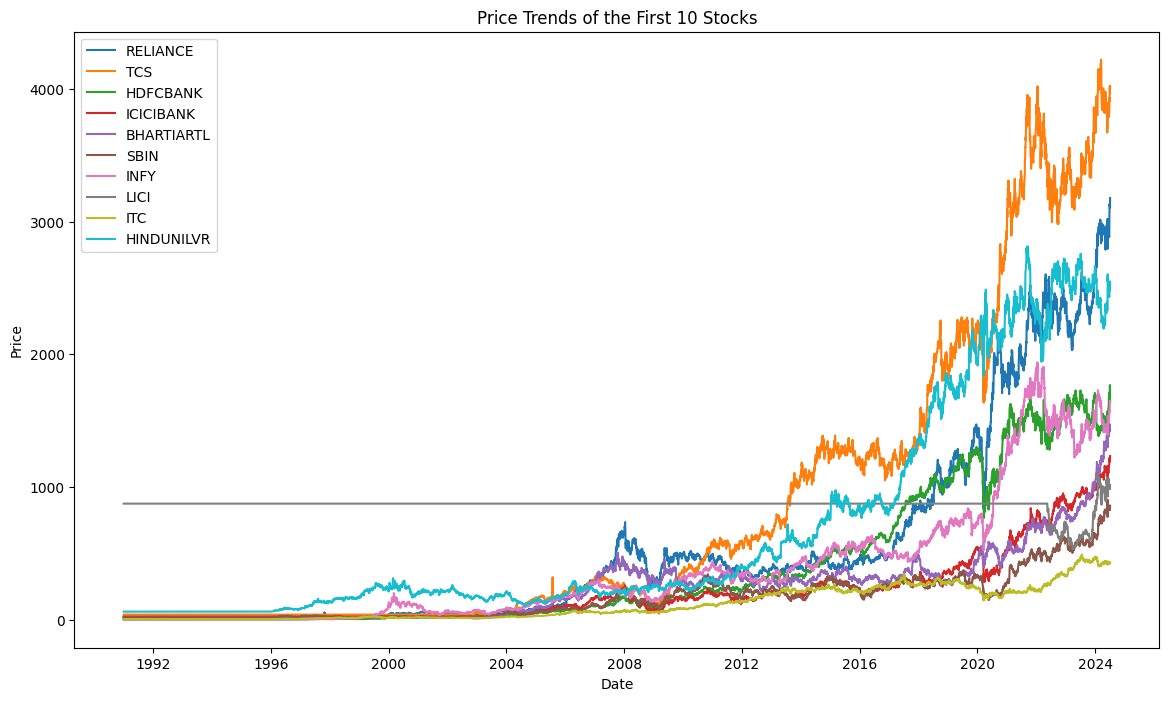

In [126]:
stocks = df.columns[1:11] # list of 1st 10 stocks

plt.figure(figsize=(14, 8)) # plotting the price trends

for stock in stocks:
    plt.plot(df['Date'], df[stock], label=stock)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Trends of the First 10 Stocks')
plt.legend()
plt.show()

### Handling Outliers

In [127]:
df.shape

(8470, 1391)

In [128]:
# Calculate Z-scores for each stock
z_scores = df.iloc[:, 1:].apply(zscore)

# Define a threshold for identifying outliers
threshold = 8

# Identify outliers
outliers = (np.abs(z_scores) > threshold).sum()
print(outliers)

# Remove outliers if necessary
df = df[(np.abs(z_scores) <= threshold).all(axis=1)]

RELIANCE       0
TCS            0
HDFCBANK       0
ICICIBANK      0
BHARTIARTL     0
              ..
DONEAR         0
CAREERP        0
INTLCONV       5
SHREEPUSHK     0
PRITIKAUTO    32
Length: 1390, dtype: int64


In [129]:
df.shape

(7872, 1391)

In [130]:
df

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,...,MAZDA,MINDTECK,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
0,1991-01-02,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,...,359.149994,94.650002,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
1,1991-01-03,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,...,359.149994,94.650002,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
2,1991-01-04,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,...,359.149994,94.650002,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
3,1991-01-07,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,...,359.149994,94.650002,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
4,1991-01-08,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,...,359.149994,94.650002,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8278,2023-09-21,2364.800049,3585.300049,1553.349976,959.299988,917.950012,588.150024,1501.750000,654.549988,447.500000,...,998.400024,139.449997,125.699997,4.000000,460.549988,101.800003,196.250000,83.699997,206.550003,20.900000
8279,2023-09-22,2354.949951,3603.649902,1529.650024,950.299988,911.400024,598.150024,1496.150024,651.299988,443.100006,...,999.900024,136.699997,128.750000,3.950000,461.149994,106.750000,188.449997,81.250000,204.649994,20.500000
8282,2023-09-27,2368.899902,3589.300049,1526.849976,943.099976,920.250000,589.750000,1467.000000,644.950012,449.149994,...,991.400024,142.750000,129.550003,3.800000,463.450012,111.300003,191.600006,80.550003,210.649994,19.500000
8289,2023-10-09,2298.250000,3638.350098,1516.250000,938.599976,924.549988,585.099976,1475.449951,635.299988,440.450012,...,1077.449951,191.050003,154.500000,3.600000,462.149994,103.150002,183.449997,79.650002,195.199997,18.700001


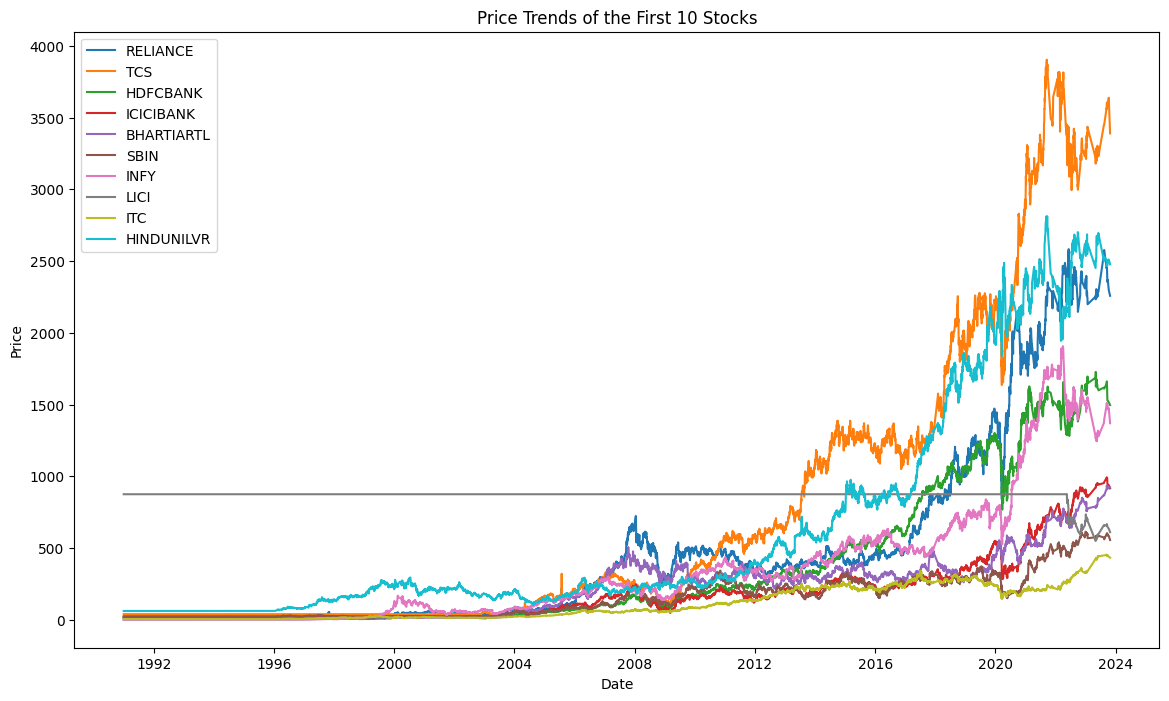

In [131]:
stocks = df.columns[1:11] # list of 1st 10 stocks

plt.figure(figsize=(14, 8)) # plotting the price trends

for stock in stocks:
    plt.plot(df['Date'], df[stock], label=stock)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Trends of the First 10 Stocks')
plt.legend()
plt.show()

### Correlation Analysis

In [132]:
# dialy returns for each stock
returns = df[stocks].pct_change()
returns

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,HINDUNILVR
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
8278,-0.007283,-0.005754,-0.006619,-0.028213,0.007961,-0.021544,0.007717,-0.001678,-0.012032,0.002635
8279,-0.004165,0.005118,-0.015257,-0.009382,-0.007135,0.017002,-0.003729,-0.004965,-0.009832,0.003679
8282,0.005924,-0.003982,-0.001831,-0.007577,0.009710,-0.014043,-0.019483,-0.009750,0.013654,0.007775
8289,-0.029824,0.013666,-0.006942,-0.004771,0.004673,-0.007885,0.005760,-0.014962,-0.019370,0.003817


In [133]:
correlation_matrix = returns.corr()
correlation_matrix

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,HINDUNILVR
RELIANCE,1.000000,0.327516,0.298302,0.313582,0.234810,0.388279,0.231138,0.017004,0.277026,0.192562
TCS,0.327516,1.000000,0.132340,0.202384,0.154503,0.121067,0.206585,0.038877,0.100287,0.111256
HDFCBANK,0.298302,0.132340,1.000000,0.442815,0.241930,0.448929,0.289202,0.008872,0.326220,0.265357
ICICIBANK,0.313582,0.202384,0.442815,1.000000,0.349725,0.526490,0.222078,-0.020115,0.240220,0.205988
BHARTIARTL,0.234810,0.154503,0.241930,0.349725,1.000000,0.269805,0.167316,-0.000382,0.181459,0.166350
SBIN,0.388279,0.121067,0.448929,0.526490,0.269805,1.000000,0.282496,0.001429,0.366202,0.249946
INFY,0.231138,0.206585,0.289202,0.222078,0.167316,0.282496,1.000000,0.089989,0.252407,0.229703
LICI,0.017004,0.038877,0.008872,-0.020115,-0.000382,0.001429,0.089989,1.000000,-0.092781,0.026203
ITC,0.277026,0.100287,0.326220,0.240220,0.181459,0.366202,0.252407,-0.092781,1.000000,0.321796
HINDUNILVR,0.192562,0.111256,0.265357,0.205988,0.166350,0.249946,0.229703,0.026203,0.321796,1.000000


In [134]:
# Unstack the correlation matrix and sort by absolute correlation values
sorted_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)

# Filter out self-correlations
most_correlated = sorted_pairs[sorted_pairs !=1]
most_correlated.head(10)

ICICIBANK  SBIN         0.526490
SBIN       ICICIBANK    0.526490
           HDFCBANK     0.448929
HDFCBANK   SBIN         0.448929
ICICIBANK  HDFCBANK     0.442815
HDFCBANK   ICICIBANK    0.442815
RELIANCE   SBIN         0.388279
SBIN       RELIANCE     0.388279
ITC        SBIN         0.366202
SBIN       ITC          0.366202
dtype: float64

### Correlation Visualization Using a Heatmap

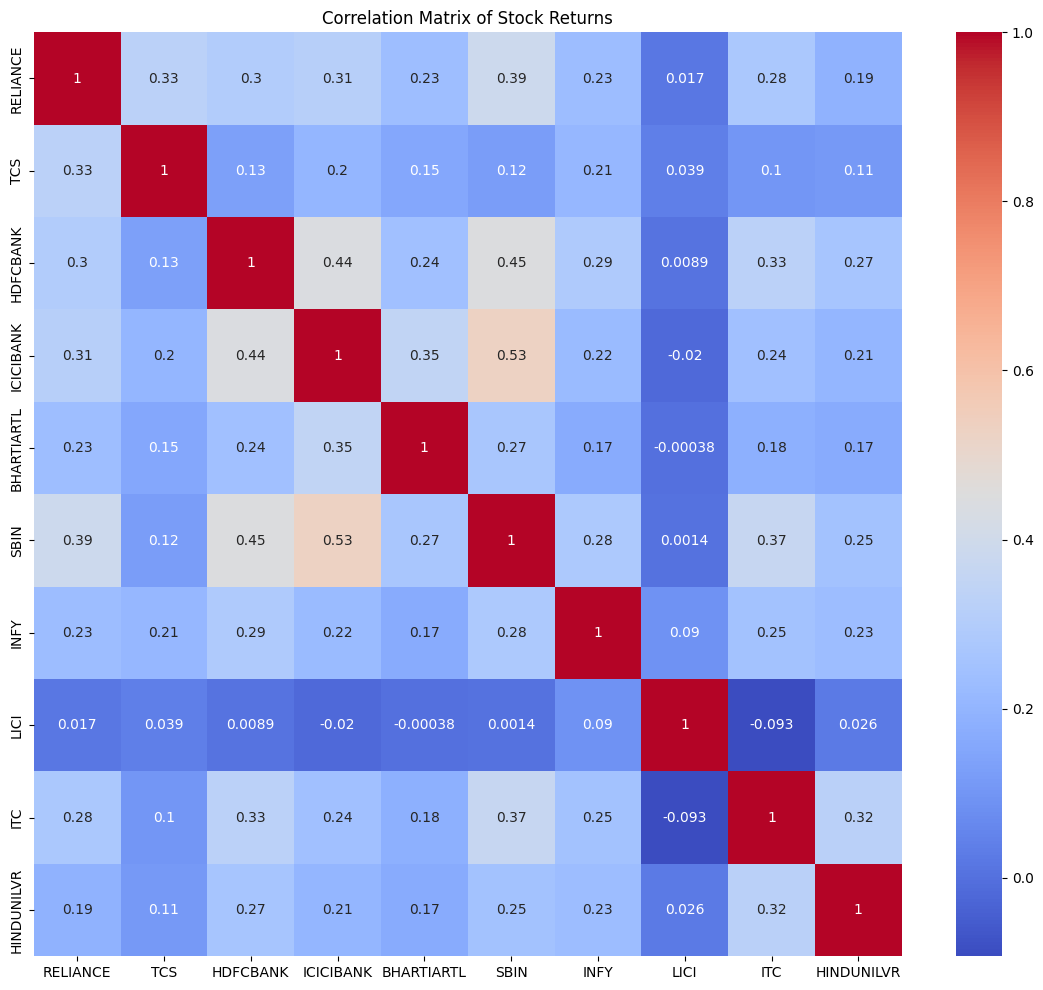

In [135]:
# Plotting the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Returns')
plt.show()

### **Positive Correlation Insights**
- **Stock Movement:**
  - **ICICIBANK & SBIN:** Highest correlation (0.53) indicates strong co-movement.
  - **ICICIBANK & HDFCBANK:** High correlation (0.44) suggests they often move together.
  - **RELIANCE & SBIN:** Moderate correlation (0.39), indicating similar trends.
  - **SBIN & ITC:** Moderate correlation (0.37), showing related movements.
- **Sector Similarity:**
  - **Banking Sector:** Strong interconnections among ICICIBANK, SBIN, and HDFCBANK.
  - **Conglomerates:** RELIANCE's correlation with SBIN reflects its diversified influence.

### **Negative Correlation Insights**
- **Risk Reduction:**
  - No strong negative correlations found, suggesting the selected stocks do not significantly move in opposite directions.

### **Diversification Strategies**
- **Asset Variety:**
  - **Include Lower Correlation Stocks:** Adding LICI or INFY can reduce overall risk.
- **Geographic Spread:**
  - **International Investments:** Helps mitigate country-specific risks.

### **Portfolio Optimization**
- **Efficient Frontier:**
  - **Balance High and Low Correlations:** Optimize risk-return by including stocks with varying correlations.
- **Risk Management:**
  - **Diversified Sectors:** Incorporate IT (INFY), consumer goods (HINDUNILVR), and finance (HDFCBANK, ICICIBANK) stocks for risk spreading.

### **Sector-Specific Insights**
- **Banking Sector:**
  - **ICICIBANK, SBIN, HDFCBANK:** High correlations indicate similar sector-wide impacts.
- **Consumer Goods and IT:**
  - **ITC & SBIN:** Moderate correlation suggests some shared market factors.
- **Diversified Conglomerates:**
  - **RELIANCE:** Acts as a balancing component with its moderate correlations across sectors.

## Time Series Decomposition

In [136]:
stock = 'RELIANCE'

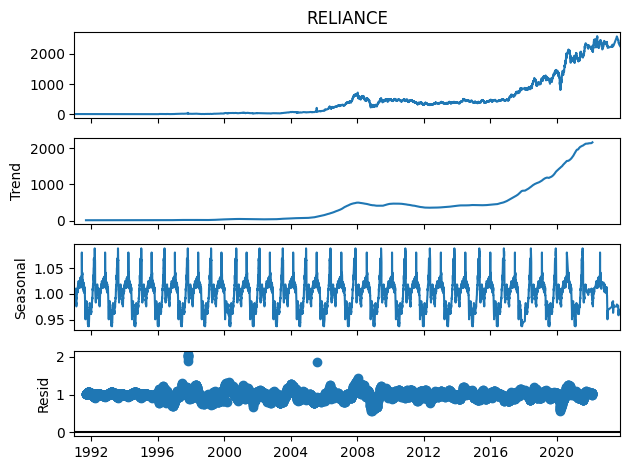

In [137]:
from statsmodels.tsa.seasonal import seasonal_decompose

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Decomposition
result = seasonal_decompose(df[stock].dropna(), model='multiplicative', period=365)

# Plot the decomposition
result.plot()
plt.show()

## Anomaly Detection

In [138]:
z_scores = np.abs((df[stock] - df[stock].mean()) / df[stock].std())

threshold = 3

anomalies = df[z_scores > threshold]
anomalies

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,HINDUNILVR,...,MAZDA,MINDTECK,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-14,2125.252930,2491.399902,1057.949951,363.700012,465.362823,198.500000,978.400024,875.250000,183.350006,2123.500000,...,456.250000,33.450001,29.650000,3.966865,107.550003,27.600000,166.800003,73.250000,122.349998,18.150000
2020-09-15,2140.297852,2491.399902,1070.500000,371.549988,476.601807,200.149994,982.450012,875.250000,181.800003,2124.449951,...,453.200012,34.500000,29.299999,3.779454,104.400002,28.450001,163.199997,73.250000,128.449997,18.150000
2020-09-16,2145.558838,2503.000000,1093.650024,374.700012,472.871826,198.199997,1001.750000,875.250000,180.649994,2143.500000,...,445.000000,34.299999,29.700001,3.592043,107.699997,27.750000,163.850006,73.250000,127.650002,18.150000
2020-09-17,2121.745605,2460.949951,1083.599976,369.000000,470.172516,195.449997,1011.000000,875.250000,178.600006,2128.199951,...,449.500000,34.650002,29.350000,3.435867,106.750000,27.600000,158.550003,73.250000,122.900002,18.150000
2020-09-18,2128.160400,2449.899902,1057.300049,369.549988,485.435944,192.600006,1002.150024,875.250000,179.100006,2098.699951,...,442.750000,33.700001,29.100000,3.592043,107.949997,27.299999,170.000000,73.250000,119.250000,18.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-21,2364.800049,3585.300049,1553.349976,959.299988,917.950012,588.150024,1501.750000,654.549988,447.500000,2473.350098,...,998.400024,139.449997,125.699997,4.000000,460.549988,101.800003,196.250000,83.699997,206.550003,20.900000
2023-09-22,2354.949951,3603.649902,1529.650024,950.299988,911.400024,598.150024,1496.150024,651.299988,443.100006,2482.449951,...,999.900024,136.699997,128.750000,3.950000,461.149994,106.750000,188.449997,81.250000,204.649994,20.500000
2023-09-27,2368.899902,3589.300049,1526.849976,943.099976,920.250000,589.750000,1467.000000,644.950012,449.149994,2501.750000,...,991.400024,142.750000,129.550003,3.800000,463.450012,111.300003,191.600006,80.550003,210.649994,19.500000


In [142]:
# Top 5 anomalies
top_anomalies = anomalies.nlargest(5, stock)
print(top_anomalies)

               RELIANCE          TCS     HDFCBANK   ICICIBANK  BHARTIARTL  \
Date                                                                        
2022-06-09  2583.245361  3427.100098  1377.699951  732.750000  676.349976   
2023-08-14  2577.250000  3449.850098  1610.900024  959.549988  867.049988   
2022-06-03  2565.477539  3440.149902  1380.300049  744.299988  686.500000   
2022-06-07  2559.247314  3362.699951  1362.599976  735.250000  685.299988   
2022-06-06  2554.447754  3430.949951  1378.449951  746.750000  682.950012   

                  SBIN         INFY        LICI         ITC   HINDUNILVR  ...  \
Date                                                                      ...   
2022-06-09  466.950012  1515.000000  721.700012  270.850006  2197.699951  ...   
2023-08-14  560.799988  1393.550049  655.799988  449.200012  2533.100098  ...   
2022-06-03  464.500000  1521.699951  800.250000  272.700012  2291.949951  ...   
2022-06-07  463.399994  1506.699951  753.000000  273.89

In [143]:
# Investigate anomalies for RELIANCE
for index, row in top_anomalies.iterrows():
    print(f"Date: {row.name}, Price: {row[stock]}")

Date: 2022-06-09 00:00:00, Price: 2583.245361328125
Date: 2023-08-14 00:00:00, Price: 2577.25
Date: 2022-06-03 00:00:00, Price: 2565.4775390625
Date: 2022-06-07 00:00:00, Price: 2559.247314453125
Date: 2022-06-06 00:00:00, Price: 2554.44775390625


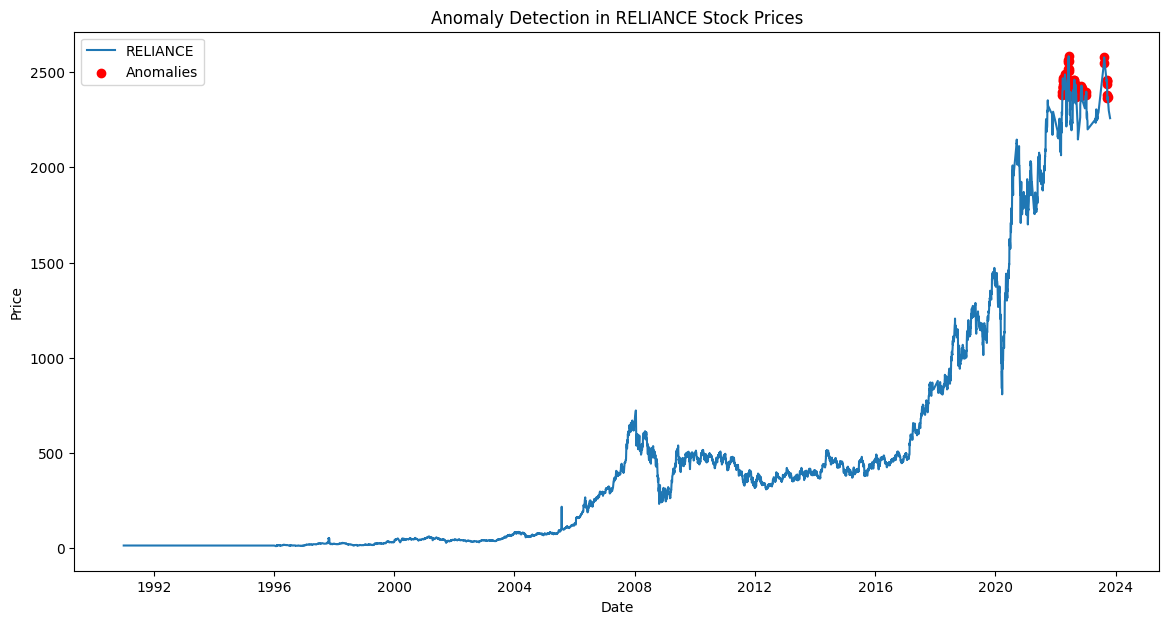

In [144]:
from sklearn.ensemble import IsolationForest

df = df.copy()

# Fit Isolation Forest model & predict anomalies
model = IsolationForest(contamination=0.01)
df['anomaly'] = model.fit_predict(df[['RELIANCE']])

# Plot anomalies
anomalies = df[df['anomaly'] == -1]

# Plot anomalies
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['RELIANCE'], label='RELIANCE')
plt.scatter(anomalies.index, anomalies['RELIANCE'], color='red', label='Anomalies')
plt.title('Anomaly Detection in RELIANCE Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Identification and Analysis of Top Anomalies in RELIANCE Stock Prices

#### 1. June 9, 2022 (Price: 2583.25)
- **Date:** June 9, 2022
- **Price:** 2583.25

Potential steps to investigate:
- **News and Events:** Research any major news or events related to RELIANCE or the broader market around this date. Look for announcements, earnings reports, or significant market movements.
- **Industry Trends:** Consider industry-specific factors that could have impacted RELIANCE’s stock price, such as regulatory changes, mergers, or competitive developments.

#### 2. August 14, 2023 (Price: 2577.25)
- **Date:** August 14, 2023
- **Price:** 2577.25

Potential steps to investigate:
- **Market Conditions:** Analyze the overall market conditions during this period. Check for macroeconomic indicators, geopolitical events, or global market trends influencing stock prices.
- **Company-Specific Factors:** Look for any company-specific news, such as product launches, strategic partnerships, or management changes, that might have affected RELIANCE’s stock.

#### 3. June 3, 2022 (Price: 2565.48)
- **Date:** June 3, 2022
- **Price:** 2565.48

Potential steps to investigate:
- **Technical Analysis:** Consider technical factors like trading volume, price patterns, and market sentiment leading up to this date. Look for signals from technical indicators or trading algorithms that could explain the price movement.
- **Market Sentiment:** Assess investor sentiment through social media, analyst reports, or sentiment analysis tools to understand the market’s perception of RELIANCE at that time.

#### 4. June 7, 2022 (Price: 2559.25)
- **Date:** June 7, 2022
- **Price:** 2559.25

Potential steps to investigate:
- **Trading Activity:** Review trading volumes and patterns on this date. Check for unusual trading activities, such as large institutional trades or high-frequency trading strategies, that could have impacted the stock price.
- **Market Volatility:** Evaluate overall market volatility during this period. Look for volatility spikes or market-wide movements that might have influenced RELIANCE’s stock.

#### 5. June 6, 2022 (Price: 2554.45)
- **Date:** June 6, 2022
- **Price:** 2554.45

Potential steps to investigate:
- **Sector Performance:** Compare RELIANCE’s performance with its industry peers on this date. Analyze sector-specific news or economic indicators affecting the entire sector.
- **Investor Behavior:** Study investor behavior and trading patterns leading to this anomaly. Look for changes in investor sentiment, trading strategies, or institutional investment decisions.